# 2. Perceptron

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Activity: Understanding Perceptrons and Their Limitations
This activity is designed to test your skills in Perceptrons and their limitations.

### Exercise 1

**Data Generation Task:**
Generate two classes of 2D data points (1000 samples per class) using multivariate normal distributions. Use the following parameters:

* Class 0: 
    * Mean = [1.5, 1.5], 
    * Covariance = [[0.5, 0], [0, 0.5]] (i.e., variance of along each dimension, no covariance).

* Class 1: 
    * Mean = [5, 5], 
    * Covariance = [[0.5, 0], [0, 0.5]].

These parameters ensure the classes are mostly linearly separable, with minimal overlap due to the distance between means and low variance. Plot the data points (using libraries like matplotlib if desired) to visualize the separation, coloring points by class.

In [113]:
n_por_classe=1000
np.random.seed(42)

mean0 = np.array([1.5, 1.5])
mean1 = np.array([5, 5])

cov = np.array([[0.5, 0], 
                [0, 0.5]])   # variância 0.5 em cada eixo, sem covariância

X0 = np.random.multivariate_normal(mean0, cov, size=n_por_classe)
X1 = np.random.multivariate_normal(mean1, cov, size=n_por_classe)

X = np.vstack([X0, X1])
y = np.hstack([np.zeros(n_por_classe, dtype=int),
               np.ones(n_por_classe, dtype=int)])

idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]

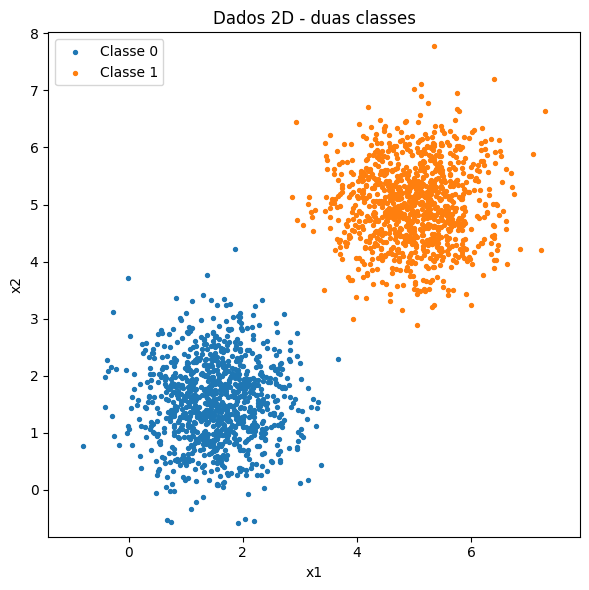

In [114]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], s=8, label='Classe 0')
plt.scatter(X[y==1, 0], X[y==1, 1], s=8, label='Classe 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dados 2D - duas classes')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

**Perceptron Implementation Task:** Implement a single-layer perceptron from scratch to classify the generated data into the two classes. You may use NumPy only for basic linear algebra operations (e.g., matrix multiplication, vector addition/subtraction, dot products). Do not use any pre-built machine learning libraries (e.g., no scikit-learn) or NumPy functions that directly implement perceptron logic.

* Initialize weights (w) as a 2D vector (plus a bias term b).

* Use the perceptron learning rule: For each misclassified sample `(x, y)`, update `w = w + η * y * x` and `b = b + η * y`, where `η` is the learning rate (start with 0.1).

* Train the model until convergence (no weight updates occur in a full pass over the dataset) or for a maximum of 100 epochs, whichever comes first. If convergence is not achieved by 100 epochs, report the accuracy at that point. Track accuracy after each epoch.

* After training, evaluate accuracy on the full dataset and plot the decision boundary (line defined by `w * x + b = 0`) overlaid on the data points. Additionally, plot the training accuracy over epochs to show convergence progress. Highlight any misclassified points in a separate plot or by different markers in the decision boundary plot.

Report the final weights, bias, accuracy, and discuss why the data's separability leads to quick convergence.


In [115]:
y_pm1 = np.where(y == 1, 1, -1).astype(int)
w = np.zeros(2, dtype=float)
b = 0.0

print("w inicial:", w, "b inicial:", b)

# --- Fazer predição (signo de w·x + b) ---
scores = X @ w + b
preds = np.where(scores >= 0.0, 1, -1)

print("primeiras predições (sem treino):", preds[:5])

w inicial: [0. 0.] b inicial: 0.0
primeiras predições (sem treino): [1 1 1 1 1]


In [116]:
# --- Checar se um ponto foi mal classificado ---
x0 = X[0]
y0 = y_pm1[0]
misclassified = y0 * (np.dot(w, x0) + b) <= 0.0
print("primeiro ponto está errado?", misclassified)

# --- Aplicar regra de atualização (só se errou) ---
eta = 0.1
if misclassified:
    w = w + eta * y0 * x0
    b = b + eta * y0

print("w após possível update:", w, "b:", b)

primeiro ponto está errado? True
w após possível update: [0.51299906 0.69042624] b: 0.1


In [117]:
# Pressupõe que X (n,2) e y em {0,1} já existem da Parte 1
y_pm1 = np.where(y == 1, 1, -1).astype(int)

# Hiperparâmetros
eta = 0.01
max_epochs = 100
np.random.seed(42)

# Inicialização
w = np.zeros(2, dtype=float)
b = 0.0

accuracies = []
updates_per_epoch = []

n = X.shape[0]

for epoch in range(1, max_epochs + 1):
    idx = np.random.permutation(n)
    X_epoch = X[idx]
    y_epoch = y_pm1[idx]

    updates = 0

    # varrer amostra a amostra
    for xi, yi in zip(X_epoch, y_epoch):
        margin = yi * (np.dot(w, xi) + b)
        if margin <= 0.0:            # misclassified (ou na margem)
            w = w + eta * yi * xi    # atualização do peso
            b = b + eta * yi         # atualização do viés
            updates += 1

    # medir acurácia nesta época (no dataset completo)
    scores = X @ w + b
    y_pred = np.where(scores >= 0.0, 1, -1)
    acc = (y_pred == y_pm1).mean()
    accuracies.append(acc)
    updates_per_epoch.append(updates)

    print(f"Época {epoch:3d} | updates: {updates:4d} | acc: {acc:.4f}")

    if updates == 0:
        print("Convergência atingida (nenhuma atualização nesta época).")
        break

# Resultados finais
final_epoch = len(accuracies)
final_acc = accuracies[-1]
print("\n--------- Finais ---------")
print("w:", w)
print("b:", b)
print("épocas:", final_epoch)
print("acurácia final:", f"{final_acc:.4f}")
print("--------------------------")


Época   1 | updates:   60 | acc: 0.9905
Época   2 | updates:   24 | acc: 0.9995
Época   3 | updates:    8 | acc: 0.9950
Época   4 | updates:    6 | acc: 1.0000
Época   5 | updates:    0 | acc: 1.0000
Convergência atingida (nenhuma atualização nesta época).

--------- Finais ---------
w: [0.0643648  0.04329078]
b: -0.36000000000000015
épocas: 5
acurácia final: 1.0000
--------------------------


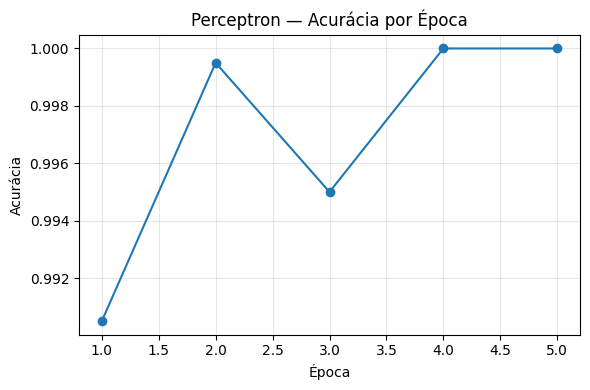

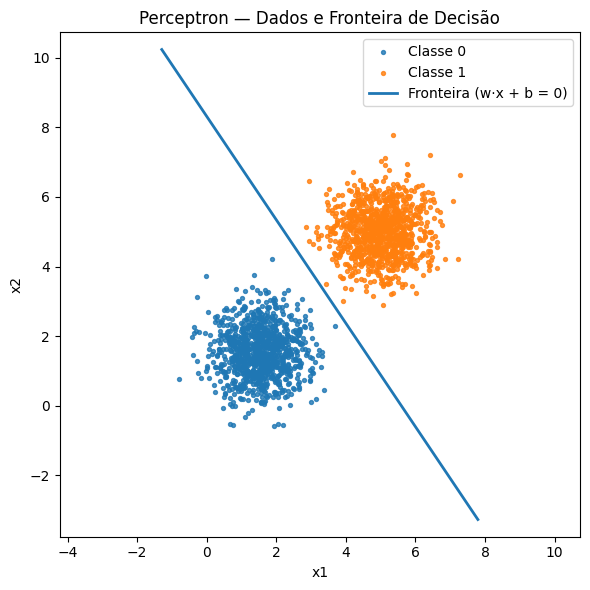

Total de pontos: 2000 | Erros: 0 | Acurácia final: 1.0000
w final: [0.0643648  0.04329078] | b final: -0.36000000000000015


In [118]:
# --- 3A) Acurácia por época ---
plt.figure(figsize=(6,4))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Perceptron — Acurácia por Época')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- 3B) Fronteira de decisão sobre os dados + erros destacados ---

# Predições finais
scores_final = X @ w + b
y_pred_pm1 = np.where(scores_final >= 0.0, 1, -1)

# Índices dos mal classificados
mis_idx = np.where(y_pred_pm1 != y_pm1)[0]

# Scatter por classe
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=8, label='Classe 0', alpha=0.8)
plt.scatter(X[y==1,0], X[y==1,1], s=8, label='Classe 1', alpha=0.8)

# Fronteira de decisão: w·x + b = 0  ->  x2 = -(w1*x1 + b)/w2 (se w2 != 0)
x1_min, x1_max = X[:,0].min()-0.5, X[:,0].max()+0.5
xs = np.linspace(x1_min, x1_max, 200)

if abs(w[1]) > 1e-12:
    ys = -(w[0]*xs + b) / w[1]
    plt.plot(xs, ys, linewidth=2, label='Fronteira (w·x + b = 0)')
else:
    # caso raro: w2 ~ 0 -> fronteira quase vertical: x1 = -b/w1
    x_vertical = -b / (w[0] if abs(w[0]) > 1e-12 else 1e-12)
    plt.axvline(x_vertical, linewidth=2, label='Fronteira (vertical)')

# Destacar mal classificados
if mis_idx.size > 0:
    plt.scatter(X[mis_idx,0], X[mis_idx,1],
                s=40, marker='x', linewidths=1.5,
                label=f'Erros ({mis_idx.size})')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron — Dados e Fronteira de Decisão')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"Total de pontos: {len(X)} | Erros: {mis_idx.size} | Acurácia final: {accuracies[-1]:.4f}")
print("w final:", w, "| b final:", b)


**Answer:** O perceptron funciona muito bem quando há separabilidade linear com boa margem, convergindo rápido e com fronteira simples. Logo, os dados gerados são ideais para o perceptron, que consegue encontrar uma fronteira linear eficaz. A baixa variância e a distância entre as médias das classes minimizam sobreposições, facilitando a classificação correta. Assim, o perceptron atinge alta acurácia rapidamente, demonstrando sua eficácia em cenários de separabilidade linear clara.